# The Graph Isomorphism Problem
The graph isomorphism problem is a computational problem in graph theory. Given two graphs, it asks whether they are isomorphic, i.e., if there exists a bijection (a one-to-one correspondence) between their vertices such that their edges are mapped to each other in a way that preserves the structure of the graph. In other words, two graphs are isomorphic if one can be transformed into the other by relabelling the vertices. It is unknown whether this problem can be solved in polynomial time.

The most efficient algorithm to determine whether two graphs are isomorphic was discovered in 2015 by László Babai, and improved upon in 2017 after a flaw was found in the original implementation.
***
## What is a Graph?
A graph is a structure which consists of a set of vertices(AKA nodes or points) and edges(AKA lines) that connect a subset of the vertices. They allow us to create an abstraction of connections between objects in a form that is easier to visulize and perform calculations on. When we draw a graph we see shapes, distances, and patterns but these typically not relevent to the mathematical form of the graph and just used to allow humans to visualize them, however certain types of graphs can contain some extra information beyond the set of vertices and connections, two common examples of this are:
* Directed graphs(AKA digraph) are graphs which have directions applied to the edges.
* Weighted graphs are graphs which have values applied to the edges to indicate things such as distance or speed.

### Some Examples of Graphs

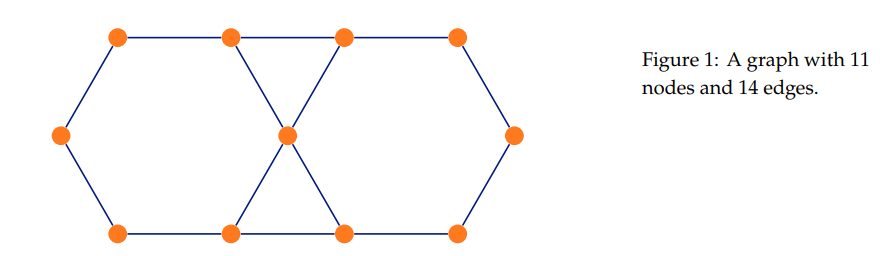
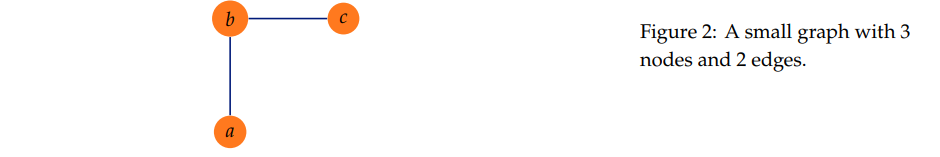
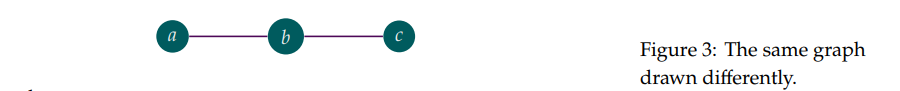

### Why is the study of graphs so important?
Graph Theory is ultimately the study of relationships. We can abstract anything from cities to internet networking to family trees and social networks down to a set a nodes and edges which can then be simplified, optimized, and quantified much more easily. Some real world use cases of graph theory are:
* Social Networks
* Route finding in maps
* The Travelling Salesman Problem
* The Internet

## Working with Graphs in Python
Anything we can represent as a graph, we can also represent as a matrix. Using powerful libraries such as IterTools(included in the standard library) and NumPy we can efficiently perform complex calculations on graphs and apply algorithms to them using Python. The NumPy library allows us to work with matrices and multi-dimensional arrays while IterTools will allow us to iterate over these objects and work with them much more efficiently. These are the two major libraries needed for performing calculations but we also can use the NetworkX library to visualise graphs using python code.

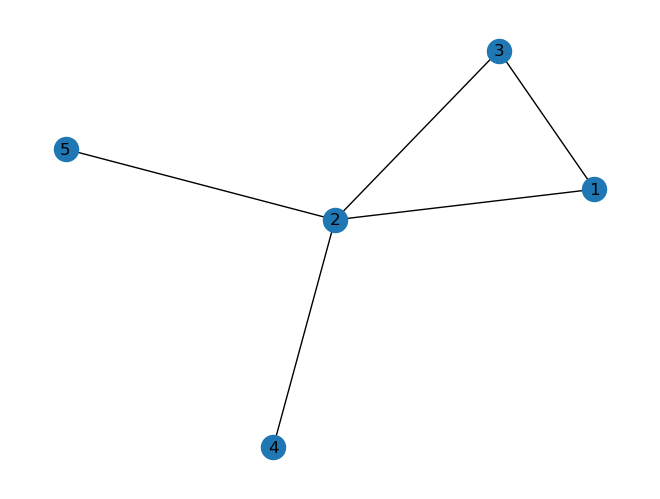

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Create a Graph
G = nx.Graph()

#add a node
G.add_node(1)
G.add_nodes_from ([2,3,4,5])
 
#add edges
G.add_edge(1,2)
 
e = (2,3)
G.add_edge(*e) # the * unpacks the tuple
G.add_edges_from([(1,2),(1,3),(2,4),(2,5)])
 
nx.draw(G, with_labels =True)
plt.savefig("basicgraph2.png")

# Graph Isomorphism
***
Graph isomorphism is the idea that two graphs are considered the same if their structure is essentially identical. In other words, if we can re-label the vertices of one graph to match those of the other, and the edges between them still connect in the same way, then the graphs are isomorphic. For example, a triangle (three vertices connected by three edges) is isomorphic to any other triangle, regardless of how it's drawn, or the labels assigned to its vertices. The image below is another example of isomorphic graphs.
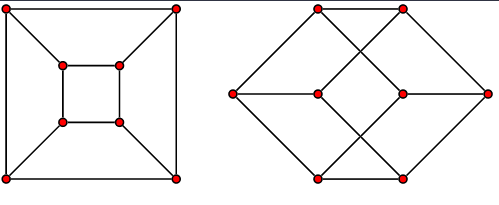

#### Why is Graph Isomorphism Important?
When we visualize a graph we add shape and order to it that is not actually relevant to the graph. So while two graphs may not appear to be the same when visualised, they can still be fundamentally equal. This becomes exponentially harder to visualise as a graph becomes larger and more complex. Some specific applications of graph isomorphism are:
* Algorithm Design for tasks such as clustering, pattern recognition, and data compression.
* Identifying similarities and differences between social, transportation, and communication networks.
* Used by physicists to model complex systems such as interactions between particles in a quantum field theory.

## The Graph Isomorphism Problem
Computationally calculating graph isomorphism is a very challenging problem. It is not known whether it can be solved efficiently by an algorithm and is there is much ongoing research being done on it. The goal for these researchers is to find an algorithm which can solve the graph isomorphism problem in polynomial time, i.e. the running time of the algorithm is directly proportional to its input size. Two graphs can be considered isomorphic if the meet the following conditions:
* The same number of nodes.
* The same number of edges.
* Corresponding nodes have the same degree, i.e. the same number of edges connected to the node.
* A bijection must exisist between the two graphs, i.e. each unique node and edge must map to a unique node or edge in the other graph.

### Calculating Graph Isomorphism
To begin with we must create an adjacency matrix to represent the graphs. An adjacency matrix is a way of representing a graph as a set of nodes and edges using ones and zeros to show the nodes that have an edge connecting them. For example, if we have a graph with nodes A, B, and C and edges (A,B), (B,C), and (C,A), the adjacency matrix representation of that graph would be:

In [6]:
import numpy as np

# Create a dictionary to map node labels to indices
node_indices = {'A': 0, 'B': 1, 'C': 2}

# Create an empty 3x3 matrix
adj_matrix = np.zeros((3, 3), dtype=int)

# Add edges to the adjacency matrix
edge_list = [('A', 'B'), ('B', 'C'), ('C', 'A')]
for edge in edge_list:
    i = node_indices[edge[0]]
    j = node_indices[edge[1]]
    adj_matrix[i][j] = 1
    adj_matrix[j][i] = 1

print(adj_matrix)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


While there are multiple factors in determening isomorphism in graphs, adjacency matrices give us a single metric that we can test against as every graph can be represented by an adjacency matrix, and two graphs are isomorphic if and only if their adjacency matrices are permutation matrices of each other.

Once we have the adjacency matrices we can begin peforming different checks(done in order of increasing computational complexity) that can determine if the graphs are not isomorphic.

The first check we can do is to see if the adjacency matrices of each graph are the same size.

In [18]:
import itertools
import numpy as np

def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)


Next, we can check if the degree sequence of the two graphs is the same. The degree sequence of a graph is a list of the degrees of all the vertices in the graph, if we oreder the sequence in decreasing order and the two sequences are different then the graphs are not isomorphic.

An example of the degree sequence is a graph with vertices labeled A, B, C, D, and edges AB, AC, AD, BD, and CD, will have a degree sequence of:

3, 3, 2, 2

A and D have a degree of 3 while B and C have a degree of 2.

In [20]:
def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence

Once these two checks are passed, the final check involves generating all possible permutations of one of the graph's adjacency matrix and comparing each on to the adjacency matrix of the other graph. If any of them match then it can be concluded that the two graphs are isomorphic.

In [21]:
def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix


Finally, we can make use of all of these functions in a single function that determines whether two graphs are isomorphic.

In [22]:
def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    
    if get_graph_order(adj_1) != get_graph_order(adj_2):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

In [32]:
Adj1 = np.array([[0,1,0,0,1],[1,0,1,0,0], [0,1,0,1,0], [0,0,1,0,1], [1,0,0,1,0]])
Adj2 = np.array([[0,0,1,1,0],[0,0,0,1,1], [1,0,0,0,1], [1,1,0,0,0], [0,1,1,0,0]])

brute_force_test_graph_isomporphism(Adj1, Adj2)

True

In [33]:
# Two graphs of different sizes
Adj1 = np.array([[0,0,1,1],[0,0,1,1], [1,1,0,0], [1,1,0,0]])
Adj2 = np.array([[0,0,1,1,0],[0,0,0,1,1], [1,0,0,0,1], [1,1,0,0,0], [0,1,1,0,0]])

brute_force_test_graph_isomporphism(Adj1, Adj2)

False

In [34]:
Adj1 = np.array([[0,0,1,1],[0,0,1,1], [1,1,0,0], [1,1,0,0]])
Adj2 = np.array([[0,0,1,1],[0,0,1,1], [1,1,0,0], [1,1,0,1]])

brute_force_test_graph_isomporphism(Adj1, Adj2)

False

In [35]:
Adj1 = np.array([[0,0,1,1],[0,0,1,1], [1,1,0,0], [1,1,0,0]])
Adj2 = np.array([[0,0,1,1],[0,0,1,1], [1,1,0,0], [1,1,0,0]])

brute_force_test_graph_isomporphism(Adj1, Adj2)

True

You may have noticed that in the "get_all_vertex_permutations" function there is an if statement to stop the calculation from being performed on graphs with greater than 8 nodes. This is because any form of brute force graph isomorphism calculation will always be performed in factorial time, O(n!). Trying to perform this calculation on anything other than simple graphs will be hopelessly inefficient, even taking a graph with just 10 nodes will produce 10!, or 3628800, different vertex permutations. This is why we refer to the calculation of graph isomorphism as the Graph Isomorphism Problem.